In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
Housing=pd.read_csv('housing data.csv',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

## DIVISIÓN TRAIN/TEST Y PREPROCESSING (M05_T02)

In [3]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
Housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
Housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### División train y test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
                                        Housing.drop('MEDV', axis = 'columns'),
                                        Housing['MEDV'],
                                        train_size   = 0.8,
                                        random_state = 1,
                                        )

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [8]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.697455,9.146743,0.00632,0.082598,0.234405,3.594927,88.9762
ZN,404.0,11.527228,23.288284,0.00000,0.000000,0.000000,20.000000,100.0000
INDUS,404.0,11.077500,6.848412,0.46000,5.190000,9.125000,18.100000,27.7400
CHAS,404.0,0.079208,0.270398,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,404.0,0.553026,0.116895,0.38500,0.448000,0.535000,0.624000,0.8710
RM,404.0,6.268792,0.689229,3.56100,5.876750,6.179000,6.626500,8.7800
AGE,404.0,67.935644,28.563186,2.90000,43.250000,76.800000,93.825000,100.0000
DIS,404.0,3.826111,2.120999,1.12960,2.105350,3.298600,5.141475,12.1265
RAD,404.0,9.470297,8.680237,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,404.0,403.257426,169.030480,187.00000,277.000000,329.000000,666.000000,711.0000


In [9]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,3.281089,5.997486,0.01096,0.07902,0.32038,3.692268,37.6619
ZN,102.0,10.715686,23.561538,0.00000,0.00000,0.00000,0.000000,95.0000
INDUS,102.0,11.371569,6.936416,1.25000,4.99500,9.90000,18.100000,27.7400
CHAS,102.0,0.029412,0.169792,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,102.0,0.561305,0.112075,0.38900,0.48400,0.54100,0.624000,0.8710
RM,102.0,6.347382,0.753613,4.13800,5.98475,6.32600,6.611750,8.7250
AGE,102.0,71.106863,26.426094,9.80000,53.07500,78.50000,95.625000,100.0000
DIS,102.0,3.671989,2.049614,1.17810,2.07900,2.89100,5.190450,10.7103
RAD,102.0,9.862745,8.849724,1.00000,4.00000,5.00000,24.000000,24.0000
TAX,102.0,427.960784,165.919873,193.00000,304.00000,384.00000,666.000000,711.0000


### Pre_processing

### Variables numéricas categóricas

In [10]:
Housing.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [11]:
Housing.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [12]:
Housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [13]:
X_train.loc[X_train['RAD']==24,'RAD']=9

In [14]:
X_train.RAD.value_counts()

9    104
5     92
4     85
3     32
2     22
6     21
8     18
7     15
1     15
Name: RAD, dtype: int64

### Normalización con MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler().fit(X_train[['TAX','AGE','NOX','INDUS','RAD']])
scaler_minmax

MinMaxScaler()

In [16]:
X_train[['TAX_NORM','AGE_NORM','NOX_NORM','INDUS_NORM','RAD_NORM']]=scaler_minmax.transform(X_train
                                                                                     [['TAX','AGE','NOX','INDUS','RAD']])

### Normalización con Robust

In [17]:
from sklearn.preprocessing import RobustScaler
scaler_robust=RobustScaler().fit(X_train[['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])
scaler_robust

RobustScaler()

In [18]:
X_train[['CRIM_R','ZN_R','RM_R','DIS_R','PTRATIO_R','B_R','LSTAT_R']]=scaler_robust.transform(X_train
                                                                                       [['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])

In [19]:
X_train.to_excel('Housing.xlsx')

In [20]:
X_train_new=X_train

In [21]:

X_train_new.drop(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],axis=1,inplace=True)

### Aplicacion del pre-processing al test

In [22]:
X_test.loc[X_test['RAD']==24,'RAD']=9

In [23]:
X_test[['TAX_NORM','AGE_NORM','NOX_NORM','INDUS_NORM','RAD_NORM']]=scaler_minmax.transform(X_test
                                                                                     [['TAX','AGE','NOX','INDUS','RAD']])

In [24]:
X_test[['CRIM_R','ZN_R','RM_R','DIS_R','PTRATIO_R','B_R','LSTAT_R']]=scaler_robust.transform(X_test
                                                                                       [['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])

In [25]:
X_test_new=X_test

In [26]:

X_test_new.drop(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],axis=1,inplace=True)

In [27]:
X_test_new.head()

,CHAS,TAX_NORM,AGE_NORM,NOX_NORM,INDUS_NORM,RAD_NORM,CRIM_R,ZN_R,RM_R,DIS_R,PTRATIO_R,B_R,LSTAT_R
307,0,0.066794,0.694130,0.179012,0.063050,0.750,-0.052696,1.650,0.893631,-0.038174,-0.201681,0.265387,-0.393107
343,0,0.349237,0.550978,0.203704,0.121701,0.500,-0.059498,2.750,0.689563,0.801515,-0.470588,0.265387,-0.428072
47,0,0.087786,0.850669,0.129630,0.236437,0.250,-0.001462,0.000,-0.198733,0.787451,-0.369748,0.058061,0.732767
67,0,0.301527,0.190525,0.049383,0.205645,0.375,-0.050256,0.625,-0.401467,1.053777,-0.033613,0.230999,-0.336164
362,0,0.914122,0.960865,0.792181,0.646628,1.000,0.980493,0.000,-1.089697,-0.393594,0.403361,-0.537503,-0.127373


In [28]:
X_test_new.describe().T

,count,mean,std,min,25%,50%,75%,max
CHAS,102.0,0.029412,0.169792,0.000000,0.000000,0.000000,0.000000,1.000000
TAX_NORM,102.0,0.459849,0.316641,0.011450,0.223282,0.375954,0.914122,1.000000
AGE_NORM,102.0,0.702439,0.272153,0.071061,0.516735,0.778579,0.954943,1.000000
NOX_NORM,102.0,0.362767,0.230606,0.008230,0.203704,0.320988,0.491770,1.000000
INDUS_NORM,102.0,0.399984,0.254267,0.028959,0.166239,0.346041,0.646628,1.000000
RAD_NORM,102.0,0.593137,0.306028,0.000000,0.375000,0.500000,1.000000,1.000000
CRIM_R,102.0,0.867425,1.707552,-0.063617,-0.044240,0.024478,0.984492,10.656030
ZN_R,102.0,0.535784,1.178077,0.000000,0.000000,0.000000,0.000000,4.750000
RM_R,102.0,0.224585,1.005153,-2.722241,-0.259086,0.196065,0.577192,3.395799
DIS_R,102.0,0.122982,0.675076,-0.698423,-0.401696,-0.134250,0.623113,2.441171


## EXERCICI 1

Creamos dos modelos de regresión, el de Regresión Linear Múltiple y el Arbol de decisión :

## Regresión Linear Multiple

Creamos el modelo :

In [29]:
modelo_mlr=LinearRegression()
modelo_mlr.fit(X_train_new,y_train)

LinearRegression()

In [30]:
print('intercepto',round(modelo_mlr.intercept_,2))

intercepto 24.7


In [31]:
print('coeficientes',modelo_mlr.coef_.round(2))

coeficientes [ 2.24 -1.49  0.09 -9.03 -0.25  3.43 -0.31  1.21  2.46 -4.69 -2.63  0.13
 -5.37]


La ecuación del modelo es :  

MEDV =   24.7   + 2.24 CHAS - 1.49 TAX_NORM  +0.09 AGE_NORM - 9.03 NOX_NORM - 0.25 INDUS_NORM + 3.43 RAD_NORM - 0.31 CRIM_R  +1.21 ZN_R + 2.46 RM_R - 4.69 DIS_R - 2.63 PTRATIO_R  +0.13 B_R -5.37 LSTAT_R

### Evaluación del modelo 


R2, el coeficiente de determinación, es una medida de la precisión general de un modelo de regresión, evalua lo bien que el modelo se ajusta a los datos reales. Es la proporción de la varianza total de la variable explicada por la regresión.

MSE, el error cuadrático medio, básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. Cuanto mayor sea este valor, peor es el modelo.

### R2

In [32]:
score =round(modelo_mlr.score(X_train_new,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_mlr.score(X_test_new,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.72
Metrica en test 0.77


### MSE

In [33]:
score =round(mean_squared_error(y_train, modelo_mlr.predict(X_train_new)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_mlr.predict(X_test_new)),2)
print('Metrica en test', score_pred)

Metrica del modelo 22.4
Metrica en test 23.15


### Predicciones con X_test_new

In [34]:
comparar_mlr= pd.DataFrame(y_test)

In [35]:
comparar_mlr['MEDV_predict']=modelo_mlr.predict(X_test_new)

In [36]:
comparar_mlr

,MEDV,MEDV_predict
307,28.2,32.662366
343,23.9,28.916918
47,16.6,17.139396
67,22.0,21.815655
362,20.8,17.958562
...,...,...
92,22.9,28.699312
224,44.8,37.936579
110,21.7,21.696240
426,10.2,17.101283


In [37]:
comparar_mlr.describe()

,MEDV,MEDV_predict
count,102.000000,102.000000
mean,22.574510,22.973219
std,9.990289,7.624278
min,6.300000,6.504793
25%,16.275000,17.292915
50%,21.850000,22.228333
75%,24.100000,26.886263
max,50.000000,42.734474


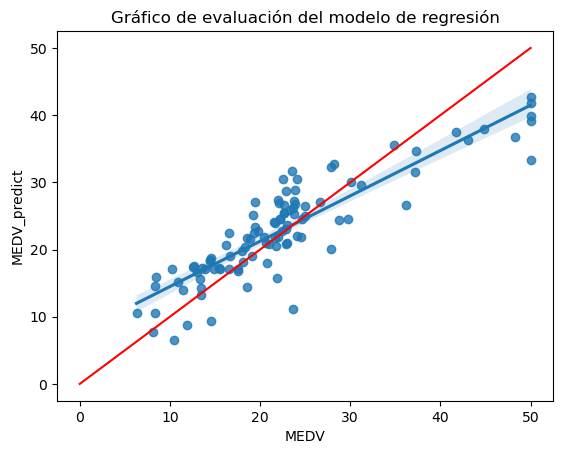

In [38]:
sns.regplot(data=comparar_mlr,x=comparar_mlr['MEDV'],y=comparar_mlr['MEDV_predict'])
X_plot = np.linspace(0, 50, 50)
Y_plot = X_plot
plt.title('Gráfico de evaluación del modelo de regresión')
plt.plot(X_plot, Y_plot, color='r')
plt.show()


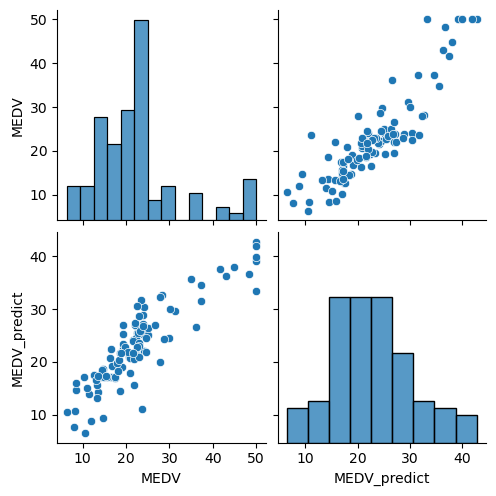

In [39]:
sns.pairplot(comparar_mlr)
plt.show()

A la vista del coeficiente R2 del 77% y de las gráficas, parece que el modelo es bastante preciso.

## Arbol de regresión

Creamos el modelo :

In [40]:
modelo_tree = DecisionTreeRegressor()
modelo_tree.fit(X_train_new, y_train)

DecisionTreeRegressor()

In [41]:
modelo_tree.get_depth()

17

In [42]:
modelo_tree.get_n_leaves()

378

In [43]:
modelo_tree.feature_importances_

array([3.04087712e-03, 7.09125329e-03, 1.18966917e-02, 3.50335415e-02,
       8.91209607e-03, 4.77841029e-04, 2.35210660e-02, 5.76383484e-04,
       2.72621498e-01, 7.67729981e-02, 2.07502737e-02, 5.62888324e-03,
       5.33676597e-01])

El árbol de decisión obtenido consta de 17 niveles y 378 hojas, es decir prácticamente una hoja por elemento del conjunto X_train que son 404.

## Evaluación del modelo

### R2

In [44]:
score =round(modelo_tree.score(X_train_new,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_tree.score(X_test_new,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 1.0
Metrica en test 0.67


### MSE

In [45]:
score =round(mean_squared_error(y_train, modelo_tree.predict(X_train_new)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_tree.predict(X_test_new)),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.0
Metrica en test 32.16


Tenemos un R2 del 100% en el conjunto de entrenamiento, en cambio tenemos un coeficiente del 67% en el test.
Al no haber facilitado ningún parámetro al modelo, el algoritmo separa el conjunto de entrenamiento hasta la unidad, debido a lo cual su profundidad aumenta y muy probablemente sufre overfitting.

## EXERCICI 2

Comparamos los dos modelos en base a los coeficientes calculados anteriormente.

El coeficiente de regresión del modelo de regresión linear en test es superior al árbol de regresión (77% versus 67%), lo cual nos indica que el modelo de regresión linear es más preciso.

Por otra parte el error cuadrático medio es superior en el caso del árbol de regresión (32,16 versus 23,15), lo cual nos confirma que el modelo de regresión linear es mejor.



## EXERCICI 3

Intentamos mejorar la predicción con un tuning de los parámetros que admiten los modelos :

### Regresión lineal múltiple

In [46]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Buscamos los mejores parámetros con GridsearchCV :

### GridsearchCV 

In [47]:
fit_intercept = [True, False]
positive=[True, False]
grid_mlr = GridSearchCV(estimator=modelo_mlr,param_grid=dict(fit_intercept = fit_intercept,positive=positive))
grid_mlr.fit(X_train_new, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [48]:
grid_mlr.best_estimator_.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Los mejores parámetros son los parámetros aplicado por defecto en el modelo original, de forma que el modelo no es mejorable.

### Arbol de decisión

In [49]:
modelo_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### GridsearchCV (parameters)

Buscamos los mejores parámetros que configuren el árbol de decisión :

In [50]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
grid_tree = GridSearchCV(estimator=modelo_tree,param_grid=parameters)
grid_tree.fit(X_train_new, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']})

In [51]:
grid_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'random_state': None,
 'splitter': 'best'}

Creamos un nuevo árbol de decisión con los parámetros propuestos :

In [56]:
modelo_tree_params=DecisionTreeRegressor(max_depth=4,max_features='auto',
    max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=2,min_weight_fraction_leaf=0.1,splitter='best')
modelo_tree_params.fit(X_train_new,y_train)


DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1)

In [57]:
modelo_tree_params.get_depth()

4

In [59]:
modelo_tree_params.get_n_leaves()

8

Tenemos ahora un modelo mucho más reducido de profunidad 4 y 8 hojas.

In [60]:
import pydotplus
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(modelo_tree_params)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [61]:
from IPython.display import Image

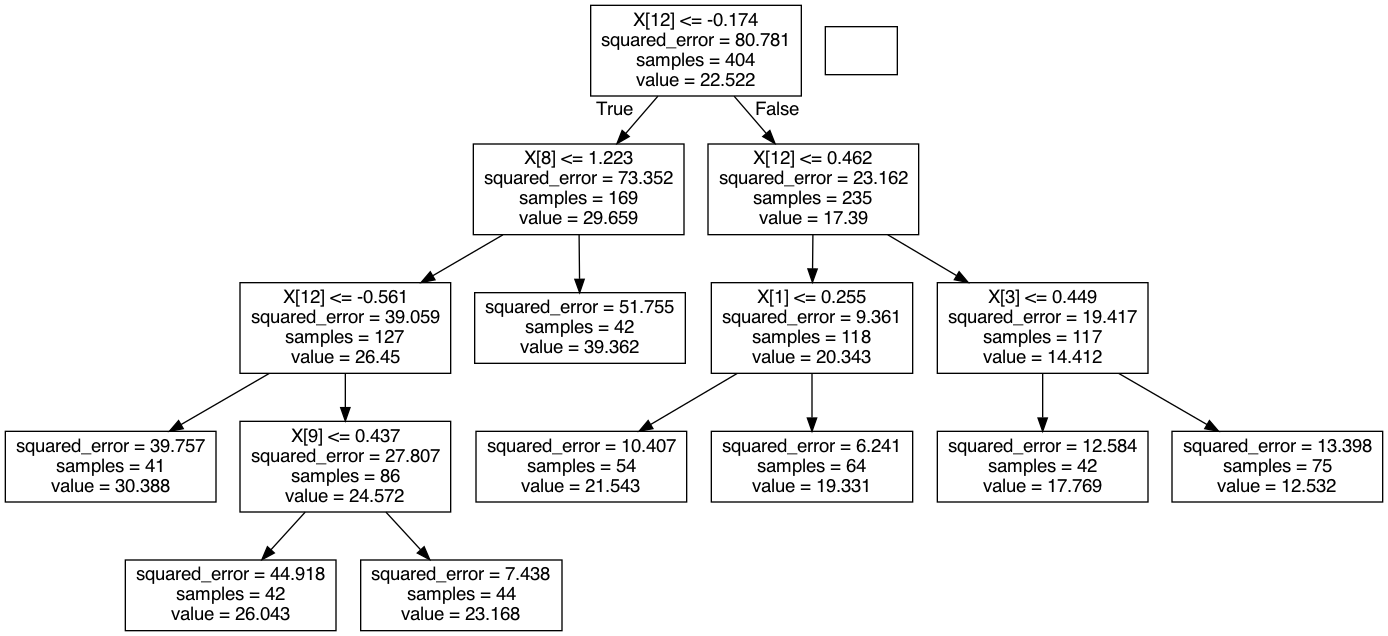

In [62]:
Image('tree.png')

### Evaluación del modelo 

### R2

In [63]:
score =round(modelo_tree_params.score(X_train_new,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_tree_params.score(X_test_new,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.74
Metrica en test 0.77


### MSE

In [64]:
score =round(mean_squared_error(y_train, modelo_tree_params.predict(X_train_new)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_tree_params.predict(X_test_new)),2)
print('Metrica en test', score_pred)

Metrica del modelo 21.07
Metrica en test 22.64


Vemos ahora que el modelo ha mejorado sustancialmente, el R2 en test es ahora del 77% (igual que el modelo de regresión linear), y MSE es de 22,64 algo inferior al de regresión linear.

In [135]:
modelo_tree_params.feature_importances_

array([0.        , 0.00619063, 0.        , 0.03191749, 0.03185717,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01214677, 0.91788795])

### Gridsearch (alpha)

Buscamos mejorar el modelo a través de la pptimización del parámetro alpha :

In [65]:
path=modelo_tree.cost_complexity_pruning_path(X_train_new, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

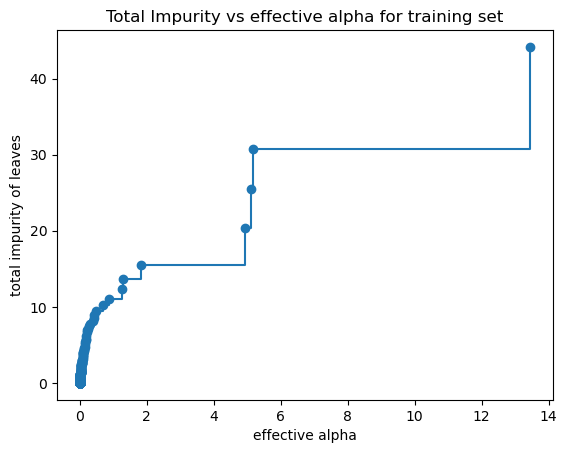

In [66]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [67]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_new, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 36.62396523865658


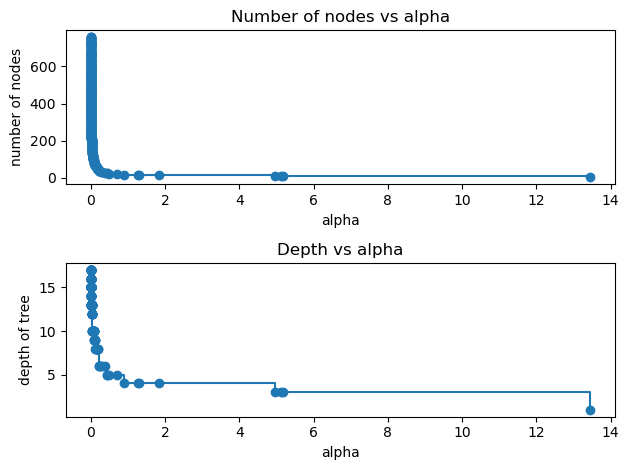

In [68]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

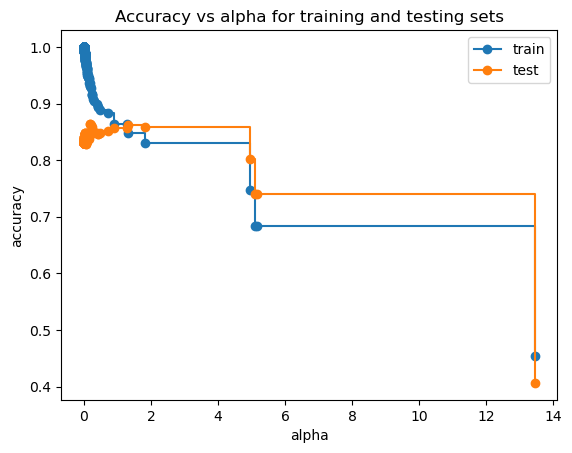

In [69]:
train_scores = [clf.score(X_train_new, y_train) for clf in clfs]
test_scores = [clf.score(X_test_new, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Esta gráfica nos enseña que el parámetro alpha óptimo es 2, creamos un arbol de regresión con este parámetro :

In [70]:
modelo_tree_alpha=DecisionTreeRegressor(ccp_alpha=2)
modelo_tree_alpha.fit(X_train_new,y_train)

DecisionTreeRegressor(ccp_alpha=2)

### R2

In [71]:
score =round(modelo_tree_alpha.score(X_train_new,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_tree_alpha.score(X_test_new,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.81
Metrica en test 0.84


### MSE

In [72]:
score =round(mean_squared_error(y_train, modelo_tree_alpha.predict(X_train_new)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_tree_alpha.predict(X_test_new)),2)
print('Metrica en test', score_pred)

Metrica del modelo 15.47
Metrica en test 15.51


Los resultados obtenidos son aún mejores que en el caso anterior y indican que posiblemente este sea el mejor modelo de todos con un R2 del 84% y MSE de 15,51.

Representamos el modelo :

In [73]:
comparar_tree_alpha=pd.DataFrame(y_test)

In [74]:
comparar_tree_alpha['MEDV_predict']=modelo_tree_alpha.predict(X_test_new)

In [75]:
comparar_tree_alpha

,MEDV,MEDV_predict
307,28.2,31.360345
343,23.9,31.360345
47,16.6,14.411966
67,22.0,23.745882
362,20.8,20.343220
...,...,...
92,22.9,23.745882
224,44.8,44.318182
110,21.7,20.343220
426,10.2,20.343220


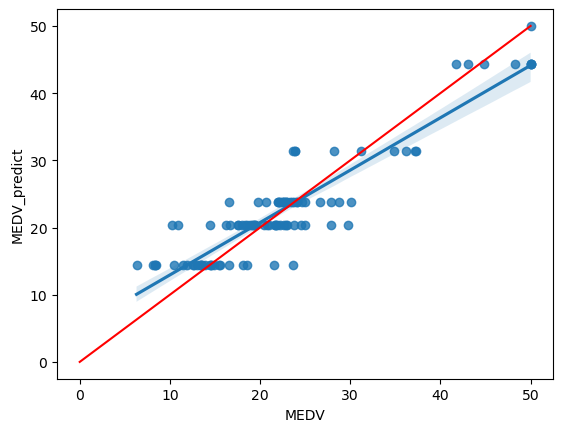

In [76]:
sns.regplot(data=comparar_tree_alpha,x=comparar_tree_alpha['MEDV'],y=comparar_tree_alpha['MEDV_predict'])
X_plot = np.linspace(0, 50, 50)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.show()

In [77]:
modelo_tree_alpha.get_depth()

4

In [78]:
modelo_tree_alpha.get_n_leaves()

6

In [79]:
dot_data= export_graphviz(modelo_tree_alpha)
graph_alpha = graph_from_dot_data(dot_data)
graph_alpha.write_png('tree_alpha.png')

True

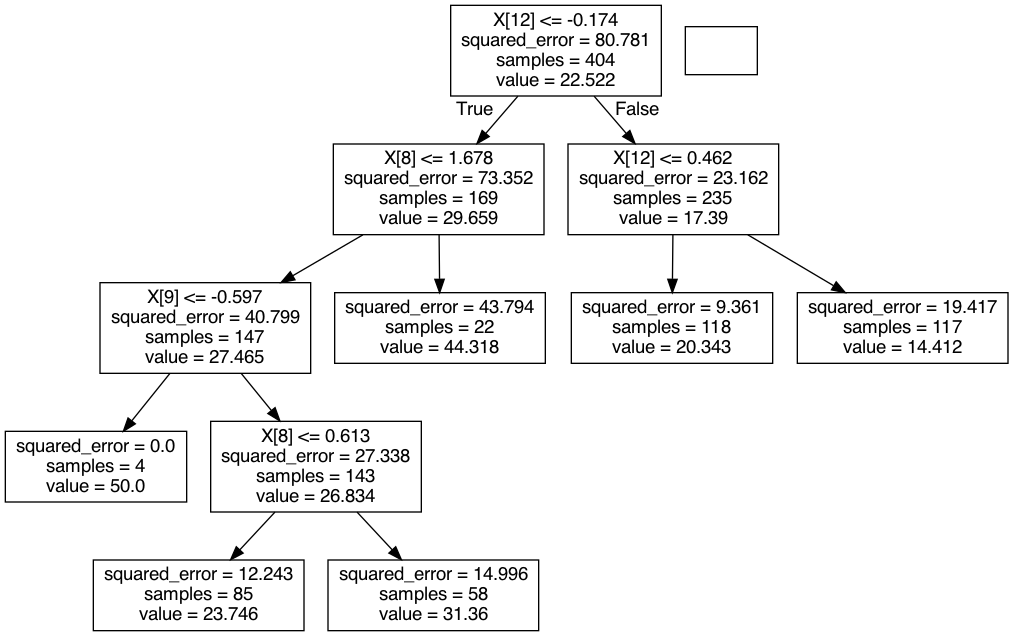

In [80]:
Image('tree_alpha.png')

In [81]:
modelo_tree_alpha.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.28176008, 0.07914201,
       0.        , 0.        , 0.63909791])

Vemos que las variables decisivas en este modelo son LSTAT (0,64), RM(0,28) y DIS(0,08).

## EXERCICI 4

Aplicamos la transformación a todo el dataset previamente a aplicar la técnica de Cross Validation :

In [82]:
X=pd.DataFrame()

In [83]:
Housing['RAD_9']=Housing['RAD']

In [84]:
Housing.loc[Housing['RAD_9']==24,'RAD']=9

Normalización con MinMaxScaler :

In [86]:
scaler_minmax_CV=MinMaxScaler().fit(Housing[['TAX','AGE','NOX','INDUS','RAD_9']])
scaler_minmax_CV

MinMaxScaler()

In [87]:
X[['TAX_NORM','AGE_NORM','NOX_NORM','INDUS_NORM','RAD_NORM']]=scaler_minmax_CV.transform(Housing
                                                                                     [['TAX','AGE','NOX','INDUS','RAD_9']])

Normalización con Robust :

In [88]:
scaler_robust_CV=RobustScaler().fit(Housing[['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])
scaler_robust_CV

RobustScaler()

In [89]:
X[['CRIM_R','ZN_R','RM_R','DIS_R','PTRATIO_R','B_R','LSTAT_R']]=scaler_robust_CV.transform(Housing
                                                                                       [['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])

In [90]:
X['CHAS']=Housing['CHAS']

In [91]:
X.shape

(506, 13)

In [92]:
X.head()

,TAX_NORM,AGE_NORM,NOX_NORM,INDUS_NORM,RAD_NORM,CRIM_R,ZN_R,RM_R,DIS_R,PTRATIO_R,B_R,LSTAT_R,CHAS
0,0.208015,0.641607,0.314815,0.067815,0.000000,-0.069593,1.44,0.496612,0.285777,-1.339286,0.261902,-0.637681,0
1,0.104962,0.782698,0.172840,0.242302,0.043478,-0.063755,0.00,0.287940,0.569789,-0.446429,0.261902,-0.221889,0
2,0.104962,0.599382,0.172840,0.242302,0.043478,-0.063760,0.00,1.323171,0.569789,-0.446429,0.066675,-0.732634,0
3,0.066794,0.441813,0.150206,0.063050,0.086957,-0.062347,0.00,1.069783,0.924391,-0.125000,0.153016,-0.841579,0
4,0.066794,0.528321,0.150206,0.063050,0.086957,-0.052144,0.00,1.271680,0.924391,-0.125000,0.261902,-0.602699,0


In [93]:
round(X.describe(),2)

,TAX_NORM,AGE_NORM,NOX_NORM,INDUS_NORM,RAD_NORM,CRIM_R,ZN_R,RM_R,DIS_R,PTRATIO_R,B_R,LSTAT_R,CHAS
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.42,0.68,0.35,0.39,0.37,0.93,0.91,0.10,0.19,-0.21,-1.67,0.13,0.07
std,0.32,0.29,0.24,0.25,0.38,2.39,1.87,0.95,0.68,0.77,4.38,0.71,0.25
min,0.00,0.00,0.00,0.00,0.00,-0.07,0.00,-3.59,-0.67,-2.30,-18.76,-0.96,0.00
25%,0.18,0.43,0.13,0.17,0.13,-0.05,0.00,-0.44,-0.36,-0.59,-0.77,-0.44,0.00
50%,0.27,0.77,0.31,0.34,0.17,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.91,0.94,0.49,0.65,1.00,0.95,1.00,0.56,0.64,0.41,0.23,0.56,0.00
max,1.00,1.00,1.00,1.00,1.00,24.68,8.00,3.48,2.89,1.05,0.26,2.66,1.00


In [95]:
y=Housing['MEDV']

El conjunto de las 13 variables independientes es X, la variables target y.

## K-fold Cross Validation

## Regresión Linear Multiple

In [96]:
from sklearn.model_selection import KFold

In [101]:
modelo = LinearRegression()
kfold_validacion = KFold(5)

### R2

In [102]:
scores = cross_val_score(modelo, X, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Media de cross_validation 0.35


### MSE

In [103]:
scores = -cross_val_score(modelo, X, y, cv = kfold_validacion,scoring='neg_mean_squared_error')
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [12.46030057 26.04862111 33.07413798 80.76237112 33.31360656]
Media de cross_validation 37.13


## Arbol de decisión (parameters)

In [104]:
modelo_params = DecisionTreeRegressor(max_depth=4,max_features='auto',
    max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=2,min_weight_fraction_leaf=0.1,splitter='best')
kfold_validacion = KFold(5)

### R2

In [105]:
scores = cross_val_score(modelo_params, X, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [ 0.67164574  0.72675097  0.54796169  0.37169567 -0.69075037]
Media de cross_validation 0.33


### MSE

In [106]:
scores = -cross_val_score(modelo_params, X, y, cv = kfold_validacion,scoring='neg_mean_squared_error')
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [11.33977851 24.87570436 36.20248396 55.10973646 44.95420658]
Media de cross_validation 34.5


## Arbol de decisión (alpha)

In [116]:
modelo_alpha = DecisionTreeRegressor(ccp_alpha=2)
kfold_validacion = KFold(5)

### R2

In [117]:
scores = cross_val_score(modelo_alpha, X, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [ 0.68352104  0.7547808   0.44276909  0.31130051 -0.44254403]
Media de cross_validation 0.35


### MSE

In [118]:
scores = -cross_val_score(modelo_alpha, X, y, cv = kfold_validacion,scoring='neg_mean_squared_error')
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [10.92966273 22.32395992 45.82072847 60.40710801 42.81135374]
Media de cross_validation 36.46


Vemos que los resultados obtenidos con el método de Cross Validation son peores que con el método train-test, los tres modelos son peores de lo que se podía pensar y dan con este método resultados muy similares.

## EXERCICI 5

Quitamos la variable RM de todos los conjuntos de análisis :

In [119]:
X_train_RM=X_train.drop('RM_R',axis='columns')

In [120]:
X_test_RM=X_test.drop('RM_R',axis='columns')

In [121]:
X_RM=X.drop('RM_R',axis='columns')

Hacemos el fit de los modelos creados anteriormente con los nuevos datos sin la variable RM :

### Regresión Lineal Múltiple

In [123]:
modelo_mlr.fit(X_train_RM, y_train)

LinearRegression()

### R2

In [124]:
score =round(modelo_mlr.score(X_train_RM,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_mlr.score(X_test_RM,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.69
Metrica en test 0.68


### MSE

In [125]:
score =round(mean_squared_error(y_train, modelo_mlr.predict(X_train_RM)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_mlr.predict(X_test_RM)),2)
print('Metrica en test', score_pred)

Metrica del modelo 25.08
Metrica en test 32.07


Los resultados empeoran sustancialmente, es lógico ya que el coeficiente de la variable MR era de los más elevados en el modelo original. Aplicamos el método de Cross Validation :

### R2

In [126]:
scores = cross_val_score(modelo, X_RM, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [0.46450601 0.61522064 0.43616681 0.57879898 0.37296639]
Media de cross_validation 0.49


### MSE

In [128]:
scores = -cross_val_score(modelo, X_RM, y, cv = kfold_validacion,scoring='neg_mean_squared_error')
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [18.49338953 35.02906394 45.15582318 36.94432119 16.67176834]
Media de cross_validation 30.46


En cambio con el Cross Validation los resultados mejoran.

### Arbol de decisión (parameters)

In [129]:
modelo_tree_params.fit(X_train_RM,y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1)

### R2

In [130]:
score =round(modelo_tree_params.score(X_train_RM,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_tree_params.score(X_test_RM,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.71
Metrica en test 0.66


### MSE

In [132]:
score =round(mean_squared_error(y_train, modelo_tree_params.predict(X_train_RM)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_tree_params.predict(X_test_RM)),2)
print('Metrica en test', score_pred)

Metrica del modelo 23.52
Metrica en test 34.04


Con método Cross Validation :

In [133]:
scores = cross_val_score(modelo_params, X_RM, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [0.45055213 0.68119079 0.3534241  0.47908526 0.0953378 ]
Media de cross_validation 0.41


In [134]:
scores = -cross_val_score(modelo_params, X_RM, y, cv = kfold_validacion,scoring='neg_mean_squared_error')
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [18.97528928 29.02335574 51.78245587 45.69039676 24.05344508]
Media de cross_validation 33.9


Este modelo no empeora tanto por el hechode quitar la variable MR, lo cual tiene lógica considerando que modelo no le había dado importancia a esta variable en un primer momento.

### Arbol de decisión (alpha)

In [136]:
modelo_tree_alpha.fit(X_train_RM,y_train)

DecisionTreeRegressor(ccp_alpha=2)

### R2

In [137]:
score =round(modelo_tree_alpha.score(X_train_RM,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_tree_alpha.score(X_test_RM,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.72
Metrica en test 0.61


### MSE

In [138]:
score =round(mean_squared_error(y_train, modelo_tree_alpha.predict(X_train_RM)),2)
print('Metrica del modelo', score)
score_pred =round(mean_squared_error(y_test, modelo_tree_alpha.predict(X_test_RM)),2)
print('Metrica en test', score_pred)

Metrica del modelo 22.63
Metrica en test 38.61


Este modelo empeora más, lo cual es lógico considerando que la variable MR era la segunda con más relevancia en el modelo.

Con Cross Validation :

In [140]:
scores = cross_val_score(modelo_alpha, X_RM, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [ 0.49649772  0.59468725  0.17233403  0.48617684 -0.41745888]
Media de cross_validation 0.27


In [141]:
scores = -cross_val_score(modelo_alpha, X_RM, y, cv = kfold_validacion,scoring='neg_mean_squared_error')
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2)) 

Metricas cross_validation [17.38854937 36.8983568  67.47911618 45.06838118 37.68784584]
Media de cross_validation 40.9
